In [ ]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd, gzip, gdown
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

### Data Preprocessing and Exploration

In [2]:
url = 'https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ'
output = 'raw_data.csv'

gdown.download(url, output, quiet=False)
raw_data = pd.read_csv(output)
raw_data.head()

Downloading...
From (original): https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ
From (redirected): https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ&confirm=t&uuid=4c211fa3-4475-4415-b46c-193d5341a1aa
To: /expanse/lustre/projects/uci150/yah015/raw_data.csv
100%|██████████| 135M/135M [00:01<00:00, 87.5MB/s] 
/scratch/yah015/job_32683303/ipykernel_1081468/2287265280.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(output)


,Beer ID,ABV,Style,Apperance,Aroma,Palate,Taste,Overall
0,63836,5.4,India Pale Ale &#40;IPA&#41;,4.0,6.0,4.0,7.0,13.0
1,71716,5,Bohemian Pilsener,4.0,5.0,3.0,6.0,14.0
2,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
3,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
4,31544,-,Sweet Stout,5.0,8.0,4.0,7.0,16.0


In [3]:
data = raw_data.drop(columns = ["Beer ID"])
for col in data.columns:
    if col != 'Style':
        data[col] = pd.to_numeric(data[col], errors = 'coerce')
print(data.shape)

(2924162, 7)


In [4]:
data = data.dropna()
data.shape

(2785525, 7)

In [5]:
X, y = data.drop(columns = ['Style']), data['Style']

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X = pd.DataFrame(X_scaled, columns = X.columns)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [9]:
len(y_train.unique())

89

In [10]:
y_train.head()

486411     India Pale Ale &#40;IPA&#41;
331821                            Stout
2726545    India Pale Ale &#40;IPA&#41;
501332                      Sweet Stout
2298874                          Bitter
Name: Style, dtype: object

In [11]:
y_train_encode = pd.get_dummies(y_train)

In [12]:
act_func = 'sigmoid'
model = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units = 128, activation = act_func),
    Dense(units = 128, activation = act_func),
    Dense(units = 128, activation = act_func),
    Dense(units = 128, activation = act_func),
    Dense(units = 89, activation = act_func)
])

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [13]:
history = model.fit(x_train.astype(float), y_train_encode, batch_size = 100, epochs = 10, verbose = 1, validation_split = 0.1)

Epoch 1/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.1176 - loss: 3.6095 - val_accuracy: 0.1890 - val_loss: 3.1450
Epoch 2/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.2020 - loss: 3.0882 - val_accuracy: 0.2091 - val_loss: 3.0530
Epoch 3/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.2066 - loss: 3.0598 - val_accuracy: 0.2126 - val_loss: 3.0397
Epoch 4/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.2076 - loss: 3.0538 - val_accuracy: 0.2099 - val_loss: 3.0364
Epoch 5/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.2097 - loss: 3.0450 - val_accuracy: 0.2134 - val_loss: 3.0246
Epoch 6/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.2105 - loss: 3.0385 - val_accuracy: 0.2160 - val_loss: 3.0176
Epoch 7/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.2121 - loss: 3.0272 - val_accuracy: 0.2069 - val_loss: 3.0522
Epoch 8/10
22563/22563 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

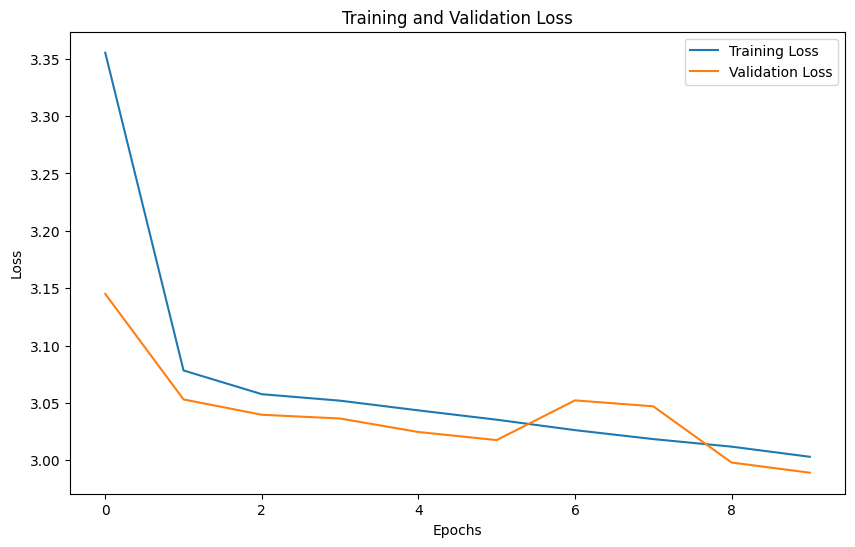

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()